<h1 style="color: #3f96d9;">Technology Time and Your Mental Health - Jeremy Thummel</h1>
<h3 style="font-weight: bold; color: white;">Analyzing the Correlation Between Screen Time and Depression Rates on a Global and Regional Scale</h3>
<img src="screenTime.jpg" style="width: 500px; border-radius: 40px; display: block; display: block; margin-left: auto; margin-right: auto;" alt="Man Stressing Over Technology"><!--Image may not appear if jpg file is not included with the additional assignment files.-->
<p>During the current age, almost everyone has been exposed to technology. Whether it is electronic billboards, or people texting on their phones, technology is everywhere. Unfortunately, it may come with a downside. I was curious to see if people’s time on technology could be responsible for poor mental health. That is why this assignment will compare the time the average human spends on technology, compared to the depression rates of society. I aim to conclude if there is a trend between these two concepts, and if the trend applies to everywhere in the world, or not.</p>

<h3 style="font-weight: bold; color: white; font-size: 35px;">Analysis:</h3>

In [12]:
import pandas as pd
import numpy as np

mentalHealthStats = pd.read_csv("mentalHealth.csv")
screenTimeStats = pd.read_csv("techUsage.csv")

<p style="font-weight: bold; color: #7da6b5;">Two main datasets will be analyzed, with one providing data on the mental health of citizens around the world, and another containing some screen time statistics.</p>
<p style="font-size: 15px; color: #b34d91;">Screen Time Data from <b>EXPLODING TOPICS</b>: https://explodingtopics.com/blog/screen-time-stats</p>
<p style="font-size: 15px; color: #b34d91">Mental Health Data from <b>kaggle</b>: https://www.kaggle.com/datasets/thedevastator/uncover-global-trends-in-mental-health-disorder/data</p>

In [13]:
# Getting and cleaning screen time data.
averageScreenTimeGlobally = screenTimeStats.Screen_Time_Global_Average_Hours
listOfApplicableYears = screenTimeStats.Year

# Getting and cleaning mental health data.
placesWithDupes = mentalHealthStats.Country_Or_Place
places = (mentalHealthStats.Country_Or_Place).drop_duplicates()
depressionStats = mentalHealthStats.Depression

<p style="font-weight: bold; color: #7da6b5;">The years of data we can look at to draw comparisons, are the years both data sets have.</p>
<p style="font-size: 15px; color: #3f96d9;">Meaning the applicable years are: 2013 - 2017</p>
<p style="font-weight: bold; color: #7da6b5;">Now the CSV data gets turned into lists (which will be used for DataFrames and graphing later).</p>

In [14]:
# Creating lists of comparable data (data that only uses years from 2013-2017).
averageScreenTimeGloballyList = [] # This is a list of average global screen time through the years.
for screenTime in averageScreenTimeGlobally:
    if screenTime == 6.80:
        break

    averageScreenTimeGloballyList.append(screenTime)

yearList = [] # This is a list of years that can be compared between screen time and the percentage of a population that is depressed.
for year in listOfApplicableYears:
    if(year > 2017):
        break

    yearList.append(year)

depressList = [] # This is a list of the percentages of a population that is depressed.
for percent in depressionStats:
    depressList.append(percent)

placesList = [] # This is a list of the places of a population that is depressed (that does not include duplicates).
for place in places:
    placesList.append(place)

placesListDupes = [] # This is a list of the places of a population that is depressed (that includes duplicates).
for place in placesWithDupes:
    placesListDupes.append(place)

<p style="font-weight: bold; color: #b34d91;">Since there is now a list of the percent of populations that are depressed, a loop will be used to only get the data of these populations from the years 2013 - 2017.</p>

In [15]:
# All depressed population values that are not for the year of 2013 - 2017 (inclusive) are deleted and stored in a new list.
counter = 0
newDepressList = []
for i in range(0,len(depressList)):
    if counter == 23 or counter == 24 or counter == 25 or counter == 26 or counter == 27:
        newDepressList.append(depressList[i])

    counter+=1

    if counter >= 28:
        counter = 0

<p style="font-weight: bold; color: #7da6b5;">Now, a proper DataFrame can be made using the countries of the world, along with their percent of population that is depressed throughout the years.</p>

In [16]:
# A proper DataFrame is made to show the different countries along with the percent of their population living with depression.
depressData = np.array(newDepressList)
depressData = depressData.reshape(len(placesList),len(yearList))

depressData = pd.DataFrame(depressData, columns = yearList, index = placesList)
print("Each Country and Their Percent of Population With Depression Each Year")

depressData

Each Country and Their Percent of Population With Depression Each Year


,2013,2014,2015,2016,2017
Afghanistan,4.1347,4.1335,4.1354,4.1357,4.1363
Albania,2.2031,2.2037,2.2045,2.2065,2.2084
Algeria,3.6225,3.6295,3.6370,3.6478,3.6611
American Samoa,2.9376,2.9373,2.9368,2.9378,2.9397
Andorra,3.7276,3.7284,3.7279,3.7268,3.7295
...,...,...,...,...,...
Vietnam,2.8849,2.8828,2.8817,2.8798,2.8794
Wales,4.0383,4.0426,4.0473,4.0567,4.0693
Yemen,4.0209,4.0188,4.0171,4.0160,4.0123
Zambia,3.5299,3.5524,3.5766,3.6088,3.6418


<p style="font-weight: bold; color: #b34d91;">Since there is now a list of the percent of populations that are depressed, a loop will be used to only get the data of these populations from the years 2013 - 2017.</p>

In [17]:
# A summarized DataFrame of the different countries along with the percent of their population living with depression is made.
pd.set_option('display.precision',4)
describedDepressData = depressData.describe()
describedDepressData

,2013,2014,2015,2016,2017
count,200.0000,200.0000,200.0000,200.0000,200.0000
mean,3.4605,3.4588,3.4576,3.4569,3.4573
std,0.6694,0.6651,0.6601,0.6548,0.6493
min,2.2031,2.1982,2.1946,2.1941,2.1962
25%,2.9606,2.9651,2.9688,2.9702,2.9725
50%,3.4382,3.4412,3.4487,3.4508,3.4615
75%,3.8899,3.8913,3.8830,3.8668,3.8708
max,6.3723,6.3470,6.3141,6.2721,6.2336


<p style="font-weight: bold; color: #7da6b5;">A proper DataFrame can now also be made for the average amount of hours a person spends on a device screen per year.</p>

In [18]:
# A proper DataFrame is made to show the average daily screen time of a person throughout the years.
yearAveragesDepressData = describedDepressData.iloc[[1]] # iloc function of Pandas fills a DataFrame with only the averages of each year's depression percentage of each country.
yearAveragesDepressData.index = ["Average Country's Depressed Population (%)"]

# Below code takes values for the averages of daily screen time and percent of populations with depression, and makes them usable by plotting libraries.
depressDataGlobal = np.array(averageScreenTimeGloballyList)
depressDataGlobal = depressDataGlobal.reshape(1,5)

averageDepressionFloatList = yearAveragesDepressData.iloc[0].values # iloc function of Pandas fills a DataFrame with only the averages of each year's depression percentage of each country.

depressDataGlobalAverage = pd.DataFrame(depressDataGlobal, columns = yearList, index = ['Average Global Person Screen Time (Hours per Day)'])
print("Average Amount of Screen Time a Person Spent Daily Each Year")
depressDataGlobalAverage

Average Amount of Screen Time a Person Spent Daily Each Year


,2013,2014,2015,2016,2017
Average Global Person Screen Time (Hours per Day),6.15,6.38,6.33,6.48,6.77


<p style="font-weight: bold; color: #b34d91;">The program now has lists of the global averages per year of the percent of a country's population that are depressed, and the average screen time of a person. <br>Graphs can now be created to show the global data.</p>

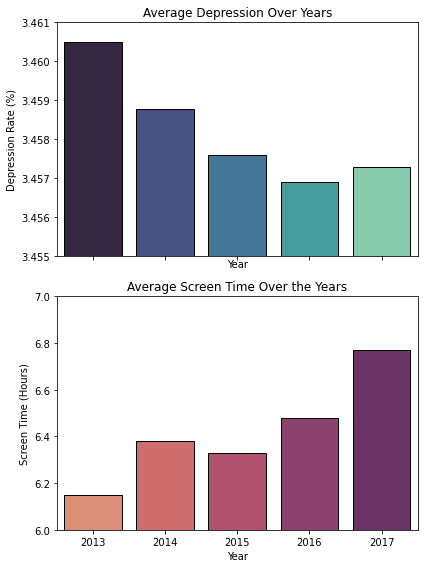

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# The first graph gets plotted, and contains two subplots to show a difference in trends.
fig, axes = plt.subplots(2,1,figsize=(6,8),sharex=True) # Both x values between axis' are shared since both have the same x axis values in correlation to their respective indexed y axis value.

# Barplot "Average Depression Over Years" is being made.
sns.barplot(x=yearList, y=averageDepressionFloatList, ax=axes[0], palette="mako", linewidth=1, edgecolor="0") # Palettes from: https://r02b.github.io/seaborn_palettes/
axes[0].set(xlabel='Year', ylabel='Depression Rate (%)', title='Average Depression Over Years')
axes[0].set_ylim(3.455,3.461) # A limit must be set to allow the graph to better show the trend of data.

# Barplot "Average Screen Time Over the Years" is being made.
sns.barplot(x=yearList, y=averageScreenTimeGloballyList, ax=axes[1], palette="flare", linewidth=1, edgecolor="0")
axes[1].set(xlabel='Year', ylabel='Screen Time (Hours)', title='Average Screen Time Over the Years')
axes[1].set_ylim(6,7)

plt.tight_layout()
plt.show()

<p style="font-weight: bold; color: #7da6b5;">Instead of looking globally, the program now checks North America's data to see if different information can be revealed.</p>

In [20]:
# Loops are used to create lists just for Canada's, the USA's, and Mexico's population percentages for citizens with depression.
indexCanada = 0
indexUSA = 0
indexMexico = 0

for place in placesListDupes:
    if place == "Canada":
        break
    indexCanada+=1

for place in placesListDupes:
    if place == "United States":
        break
    indexUSA+=1

for place in placesListDupes:
    if place == "Mexico":
        break
    indexMexico+=1

depressListCanada = []
depressListUS = []
depressListMexico = []

# I use the range 23-28 since it includes the index 23 of year 2013, and goes to the inclusion of index 27 (which holds the data from year 2017).
# That gives me the data from the years 2013-2017, which I can compare to the average screen time from years 2013-2017.
for i in range(23,28):
    depressListCanada.append(depressList[i+indexCanada])
    depressListUS.append(depressList[i+indexUSA])
    depressListMexico.append(depressList[i+indexMexico])

<p style="font-weight: bold; color: #b34d91;">Now the program can demonstrate the change in North America's countries' depression over the years 2013 - 2017.
<br>It is important to note that the values for the next graph have been normalized, so that each country's data can be relative to each other.</p>
<p style="font-size: 15px; color: #3f96d9;">**This way every country's percentage of depressed citizens will be on a scale from 0 to 1, and thus can be compared.</p>

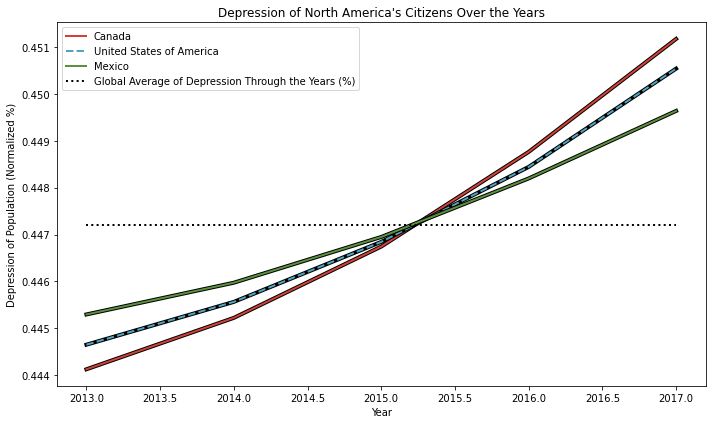

In [21]:
from sklearn import preprocessing # sklearn is a library being used with information learned from https://www.digitalocean.com/community/tutorials/normalize-data-in-python.
# sklearn comes with a normalize function of the preprocessing module, that allows values to be normalized in this program.

depressListCanadaNormalize = preprocessing.normalize([depressListCanada])
depressListUSNormalize = preprocessing.normalize([depressListUS])
depressListMexicoNormalize = preprocessing.normalize([depressListMexico])

# Lists must be flattened so they can be used by matplotlib.
depressListCanadaNormalize = depressListCanadaNormalize.flatten()
depressListUSNormalize = depressListUSNormalize.flatten()
depressListMexicoNormalize = depressListMexicoNormalize.flatten()

# Lineplot "Depression of North America's Citizens Over the Years" is being made.
fig2, ax2 = plt.subplots(figsize=(10,6))

ax2.plot(yearList, depressListCanadaNormalize, color="black", linewidth=4)
ax2.plot(yearList, depressListCanadaNormalize, color="#d14338", label="Canada", linewidth=2)

ax2.plot(yearList, depressListUSNormalize, color="black", linewidth=4)
ax2.plot(yearList, depressListUSNormalize, color="#50a4bf", linestyle="dashed", label="United States of America", linewidth=2)

ax2.plot(yearList, depressListMexicoNormalize, color="black", linewidth=4)
ax2.plot(yearList, depressListMexicoNormalize, color="#5c9140", label="Mexico", linewidth=2)

# groupby() is used to get the average of the all percentages of depressed citizens through the years.
depressionGroupOrdered = mentalHealthStats.groupby('index')
depressionAverages = depressionGroupOrdered['Depression'].mean()
meanOfAllDepressions = depressionAverages.mean()

# When making a line plot that is representative of a contstant like the the average of the all percentages of depressed citizens through the years,
# the program uses a loop to create a plot that has will have the same value for all 5 of its data points.
meanList = []
for num in range(0,5):
    meanList.append(meanOfAllDepressions)

# Since the data for the graphs is all normalized, the mean must be as well.
meanListNormalize = preprocessing.normalize([meanList])
meanListNormalize = meanListNormalize.flatten()

ax2.plot(yearList, meanListNormalize, color="black", label="Global Average of Depression Through the Years (%)", linestyle="dotted", linewidth=2)

ax2.legend()

plt.xlabel("Year")
plt.ylabel("Depression of Population (Normalized %)")
plt.title("Depression of North America's Citizens Over the Years")
plt.tight_layout()
plt.show()

<p style="font-weight: bold; color: #7da6b5;">The next plots are pie charts, that will help determine the changes of the countries of North America's depressed population percentages relative to each other.</p>

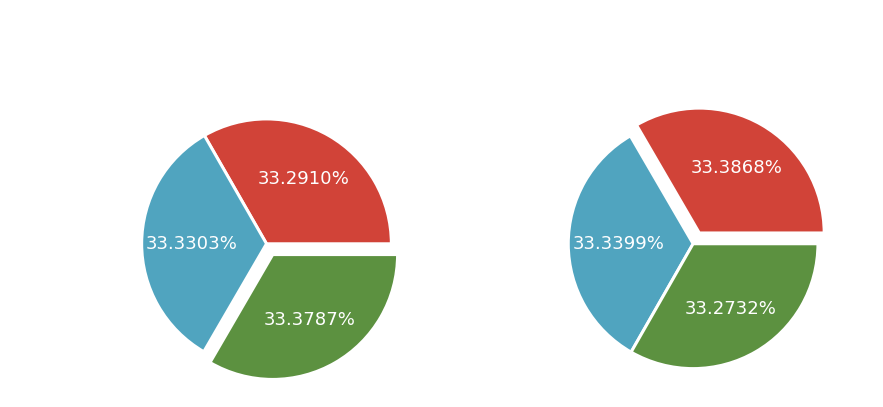

In [22]:
# Pie charts for "Depressed Population Densities of North America" for 2013 and 2017 are being made.
fig3, axes3 = plt.subplots(1,2,figsize=(12,8))

depressions2013 = [depressListCanadaNormalize[0], depressListUSNormalize[0], depressListMexicoNormalize[0]]
axes3[0].pie(depressions2013, labels=["Canada","United States\nof America","Mexico"], explode=[0, 0, 0.1], colors=['#d14338','#50a4bf','#5c9140'], autopct='%1.4f%%', wedgeprops={"linewidth": 3, "edgecolor": "white"}, textprops={'fontsize': 18, 'color': 'white'}) # https://proclusacademy.com/blog/customize_matplotlib_piechart/ and https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html were used for styling the plots.
axes3[0].set_title("Depressed Population\nDensities of North America\nin 2013 (Normalized)", color="white", fontsize=24, weight="bold")

depressions2017 = [depressListCanadaNormalize[4], depressListUSNormalize[4], depressListMexicoNormalize[4]]
axes3[1].pie(depressions2017, labels=["Canada","United States\nof America","Mexico"], explode=[0.1, 0, 0], colors=['#d14338','#50a4bf','#5c9140'], autopct='%1.4f%%', wedgeprops={"linewidth": 3, "edgecolor": "white"}, textprops={'fontsize': 18, 'color': 'white'})
axes3[1].set_title("Depressed Population\nDensities of North America\nin 2017 (Normalized)", color="white", fontsize=24, weight="bold")

plt.tight_layout()
plt.show()

<h3 style="font-weight: bold; color: white; font-size: 35px;">Discussion:</h3>
<p>
<h3 style="font-weight: bold; color: white;">Bar Graphs:</h3>
The first bar graph has a negative trend, and shows that the depression among countries is going down.
<br>
The second bar graph has a positive trend, and shows that the average person spends more time on their electronics as the years go by.
<br>
Therefore, it can be concluded from these graphs that the more time an average person spends on electronics, the less chance they may have of being depressed.
<br>
<br>
<h3 style="font-weight: bold; color: white;">Line Graphs:</h3>
Interestingly, using exclusively North America, it is seen that the opposite is true. The line graph reveals in North America over the span of years 2013 - 2017,
<br>the percentage of each country's population that is depressed is increasing.
<br>This opposes the global average trend seen in the bar graph.
<br>I believe this may be due to other factor's outside of screen time
<br>that North America may be experiencing, which other nations are not.
<br>This line chart reveals Canada has the fastest growing percentage of people who are depressed in North America,
<br>followed steadily by the United States of America,
<br>and with Mexico in last.
<br>This graph further reveals that Canada climbed from being the country in North America with having the lowest rate at which people were becoming depressed over the years,
<br>whereas Mexico began with being the highest and dropped to the lowest.
<br>
<br>
<h3 style="font-weight: bold; color: white;">Pie Charts:</h3>
Further analyzing North America, pie charts can be used to determine if any country's rate at which their depression is increasing is greater than the rest.
<br>
The pie charts' difference from 2013's data to 2017's, reveals Canada has the highest growing depression percentage out of the North American countries, but not by much.
<br>
There are certainly a number of factors that over the years may be causing this, such as:
<b>
<br>
<br>
- Residential Markets
<br>
- Economies
<br>
- Growing Global Tensions
<br>
<br>
</b>
With the other countries having different factors for the increase of their citizens' depression, just not as high of an increase as it is for Canada.
<br>
<br>
<b>
<h3 style="font-weight: bold; color: white;">Conclusion:</h3>
Overall, the data discussed allows some conclusions to be drawn.
<br>
<br>
The average global citizen is becoming less depressed as time passes.
<br>
<br>
Furthermore, the data from North America goes against the global conclusion. This could show a possible unreliability screen time has as a factor of a population becoming depressed.
<br>
<br>
Thus, analyzing just North America reveals Canada to have the fastest increasing rate of which citizens are becoming depressed out of the three countries.
<br>
Furthermore, not just Canada, but all countries of North America oppose the global conclusion, and are actually becoming more depressed.
<br>
That is why I believe there are external factors I am not accounting for that North American experiences that other parts of the world do not.
<br>
<br>
In conclusion, it depends where the citizen resides. That is what affects the percent of a nation's depressed people. Though on average, while people are spending more time on screens, the depression rates appear to be lowering.
<br>
<br>
Thank you,
<br>
Jeremy Thummel
</b>
</p>

<h2 style="text-align: center; font-weight: bold; color: white;">References - Chronological Order</h2>
<p style="text-align: center;">
Introduction Image Source: https://www.vox.com/science-and-health/2019/2/26/18241265/smartphone-tech-mental-health-teens
<br>
<br>
Screen Time Data from: https://explodingtopics.com/blog/screen-time-stats
<br>
<br>
Mental Health Data from: https://www.kaggle.com/datasets/thedevastator/uncover-global-trends-in-mental-health-disorder/data
<br>
<br>
sklearn Library Information Source: https://www.digitalocean.com/community/tutorials/normalize-data-in-python
<br>
<br>
Pie Chart Styling Sources:
<br>
https://proclusacademy.com/blog/customize_matplotlib_piechart/
<br>
https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
</p>
